In [367]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import seaborn as sns; sns.set(font_scale=1.2)
from scipy import stats

In [368]:
## Load the CSV file

data = pd.read_csv('diabetes.csv')

print(data[:10])
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [369]:

##split the data into training and testing data
X = data.drop('Outcome', axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [370]:
print(X_train[0:10])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
340            1      130             70             13      105  25.9   
535            4      132              0              0        0  32.9   
306           10      161             68             23      132  25.5   
718            1      108             60             46      178  35.5   
90             1       80             55              0        0  19.1   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  


In [371]:
# ## convert pd to np stack
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [372]:
print(X_train[0:10])

[[2.000e+00 8.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.040e-01
  2.100e+01]
 [9.000e+00 1.120e+02 8.200e+01 2.400e+01 0.000e+00 2.820e+01 1.282e+00
  5.000e+01]
 [1.000e+00 1.390e+02 4.600e+01 1.900e+01 8.300e+01 2.870e+01 6.540e-01
  2.200e+01]
 [0.000e+00 1.610e+02 5.000e+01 0.000e+00 0.000e+00 2.190e+01 2.540e-01
  6.500e+01]
 [6.000e+00 1.340e+02 8.000e+01 3.700e+01 3.700e+02 4.620e+01 2.380e-01
  4.600e+01]
 [1.000e+00 1.300e+02 7.000e+01 1.300e+01 1.050e+02 2.590e+01 4.720e-01
  2.200e+01]
 [4.000e+00 1.320e+02 0.000e+00 0.000e+00 0.000e+00 3.290e+01 3.020e-01
  2.300e+01]
 [1.000e+01 1.610e+02 6.800e+01 2.300e+01 1.320e+02 2.550e+01 3.260e-01
  4.700e+01]
 [1.000e+00 1.080e+02 6.000e+01 4.600e+01 1.780e+02 3.550e+01 4.150e-01
  2.400e+01]
 [1.000e+00 8.000e+01 5.500e+01 0.000e+00 0.000e+00 1.910e+01 2.580e-01
  2.100e+01]]


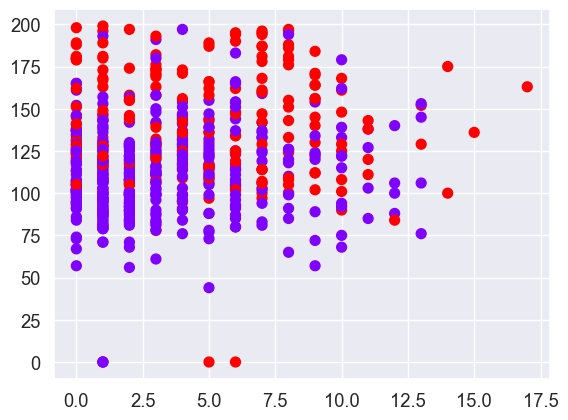

In [373]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow'); 

In [374]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Get the current Axes instance on the current figure matching the given keyword args, or create one.
    ax = ax or plt.gca() 
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [375]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [376]:
test_d = X_train[:, 1:3]

In [377]:
print(test_d.shape)

(614, 2)


C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


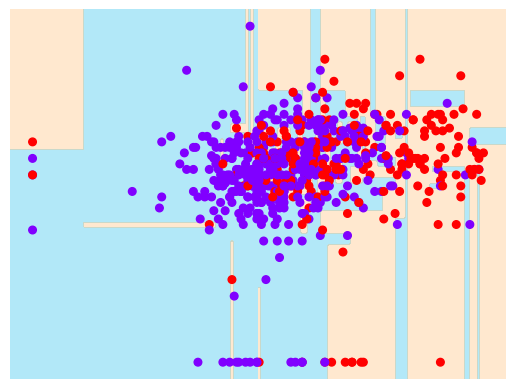

In [378]:
from sklearn.tree import DecisionTreeClassifier # import the decision tree classifier
visualize_classifier(DecisionTreeClassifier(), test_d, y_train)

C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


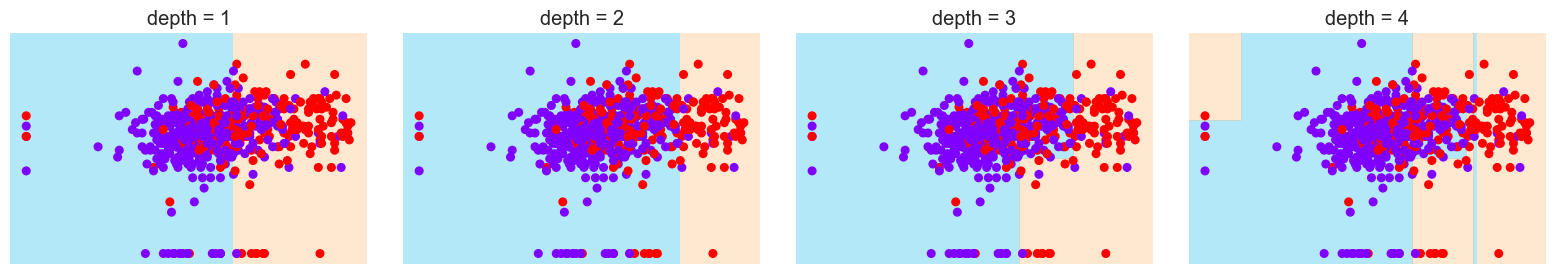

In [379]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3)) # create a figure with 4 axes
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth) # the depth of a decision tree can be given
    visualize_classifier(model, test_d, y_train, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('decision-tree-levels.png')

[Text(0.5, 0.8333333333333334, 'x[0] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.5, 'x[0] <= 99.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.145\nsamples = 153\nvalue = [141, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.394\nsamples = 237\nvalue = [173, 64]'),
 Text(0.75, 0.5, 'x[0] <= 159.5\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 143\nvalue = [74, 69]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.269\nsamples = 81\nvalue = [13, 68]')]

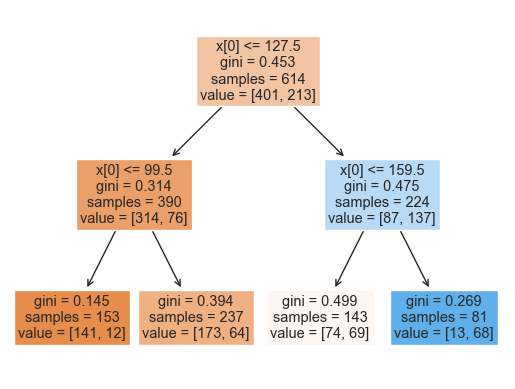

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=2).fit(test_d, y_train) # to a depth of 2

# model = DecisionTreeClassifier(max_depth=3).fit(X, y) # to a depth of 3

# model = DecisionTreeClassifier(max_depth=4).fit(X, y) # to a depth of 4

tree.plot_tree(model, filled=True)

C:\Users\Spoon\AppData\Local\Temp\ipykernel_26376\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


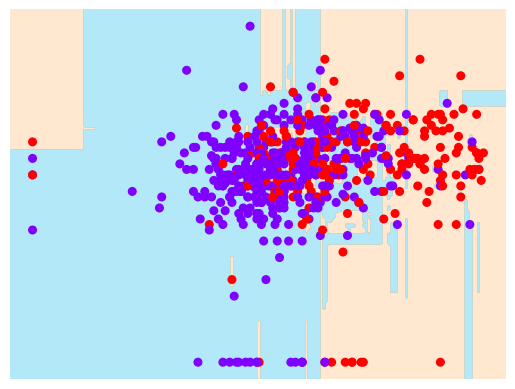

In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(test_d, y_train)
visualize_classifier(bag, test_d, y_train)

In [382]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=2)

# model = RandomForestClassifier(n_estimators=100, max_features="log2", random_state=0)

model = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_samples=0.6)
# visualize_classifier(model, test_d, y_train)

In [383]:
model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6)

In [384]:
preds = model.predict(X_test)

In [385]:
acc = accuracy_score(y_test, preds)
print(acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
print(cm)

0.7467532467532467
[[79 20]
 [19 36]]
